In [1]:
import os
os.environ['HTTP_PROXY'] = "http://127.0.0.1:10809"
os.environ['HTTPS_PROXY'] = "http://127.0.0.1:10809"

In [2]:
import ee
import geemap
import matplotlib.pyplot as plt
import numpy as np

Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

In [3]:
# 输入研究区的shp文件所在路径
wuhan_shp ="D:/NDVI_exercise/wuhan/wuhanregion.shp"
# shp 转 ee 
wuhan_ee = geemap.shp_to_ee(wuhan_shp)
# 添加到layer
Map.addLayer(wuhan_ee,{},"wuhan")
Map.centerObject(wuhan_ee,7)   # 设置以研究区居中

In [4]:
# # background = ee.Image.constant(1).clip(wuhan_ee)
# # Map.addLayer(background,{'palette':['white']},"background")
# # dataset = ee.Image('JRC/GSW1_2/YearlyHistory/2018').clip(wuhan_ee).select('waterClass').gt(2).selfMask()
# water_data = ee.ImageCollection('JRC/GSW1_2/MonthlyHistory').filterDate('2018-12-01','2018-12-31').first().clip(wuhan_ee)
# visualization = {
#     'bands': ['water'],
#     'min': 0.0,
#     'max': 2.0,
#     'palette': ['ffffff', 'fffcb8', '0905ff']
# }
# # Map.addLayer(dataset, visualization, 'Water Class')
# Map.addLayer(water_data, visualization, 'Water')

# acquire  area of wuhan's permanent water yearly

In [5]:
year = np.arange(2010,2019,1)
permanent_water = []
for i in range(2010,2019,1):
    water_data = ee.Image("JRC/GSW1_2/YearlyHistory/{}".format(i))
    water = water_data.eq(3).selfMask().multiply(ee.Image.pixelArea()).divide(1e6)
    areas = water.reduceRegion(**{
      'reducer': ee.Reducer.sum(),
      'geometry': wuhan_ee.geometry(),
      'scale': 30,
      'maxPixels': 1e14
    })
    permanent_water.append(areas.get('waterClass').getInfo())
    print(areas.getInfo())

{'waterClass': 706.8816422931666}
{'waterClass': 675.429575303598}
{'waterClass': 720.5352044956962}
{'waterClass': 721.2729045176766}
{'waterClass': 700.7690358956702}
{'waterClass': 742.8197875795443}
{'waterClass': 739.8565755836654}
{'waterClass': 731.531439573101}
{'waterClass': 725.1956378415728}


# acquire  area of wuhan's seasonal water yearly

In [6]:
seasonal_water = []
for i in range(2010,2019,1):
    water_data = ee.Image("JRC/GSW1_2/YearlyHistory/{}".format(i))
    water = water_data.eq(2).selfMask().multiply(ee.Image.pixelArea()).divide(1e6)
    areas = water.reduceRegion(**{
      'reducer': ee.Reducer.sum(),
      'geometry': wuhan_ee.geometry(),
      'scale': 30,
      'maxPixels': 1e14
    })
    seasonal_water.append(areas.get('waterClass').getInfo())
    print(areas.getInfo())

# 1984-2019年间永久水体（permanent water）的面积

In [ ]:
water_data = ee.Image('JRC/GSW1_2/GlobalSurfaceWater')
water = water_data.select('occurrence').gte(80).selfMask().multiply(ee.Image.pixelArea()).divide(1e6)
areas = water.reduceRegion(**{
      'reducer': ee.Reducer.sum(),
      'geometry': wuhan_ee.geometry(),
      'scale': 30,
      'maxPixels': 1e14
})
permanent_waterArea = areas.get('occurrence').getInfo()
print(permanent_waterArea)

# 绘图

In [11]:
# # Maryland university 水体数据统计
Maryland_permanent_water = [1777.3092,1423.6812,1762.2351,1423.8504,1498.8069,1480.9977,1456.2,1439.415,1401.5601]
Maryland_seasonal_water = [807.2766,596.2185,549.4374,524.2302,710.0667,666.8289,836.8893,747.8775,723.0456]
# # 基于RF的permanent water extraction
RF_permanent_water = [1041.6119923013812, 950.4957403648785, 983.3418449446425, 1000.8603491473023, 928.9684128044594, 952.7147524866792, 945.3334193811432, 905.8537662994411, 888.3464582578855]

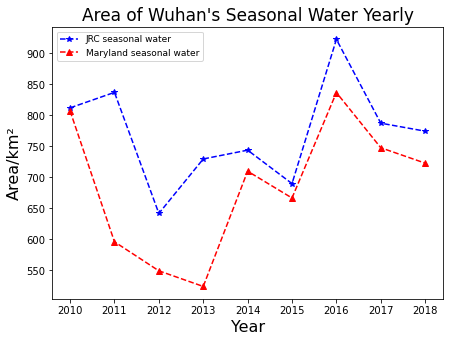

In [32]:
# # plot permanent water
# plt.title("Area of Wuhan's Permanent Water Yearly", fontsize=18)
# plt.xlabel("Year", fontsize=14)
# plt.ylabel('Area/km²', fontsize=14)
# plt.plot(year, permanent_water,'*:b' ,label = 'JRC permanent water')
# # 绘制1984-2019间的永久水体（permanent water）面积
# plt.axhline( permanent_waterArea,ls = '--',label = '1984-2019 permanent water')
# plt.legend()
# plt.show()

# # plot seasonal water
# plt.title("Area of Wuhan's Seasonal Water Yearly", fontsize=18)
# plt.xlabel("Year", fontsize=14)
# plt.ylabel('Area/km²', fontsize=14)
# plt.plot(year, seasonal_water,'*:r',label = 'JRC seasonal water')
# plt.legend()
# plt.show()

# plot permanent water and seasonal water(折线图)
plt.figure(figsize=(7,5))
plt.title("Area of Wuhan's Seasonal Water Yearly", fontsize=17)
plt.xlabel("Year", fontsize=16)
plt.ylabel('Area/km²', fontsize=16)
# plt.plot(year, permanent_water,'*-b' ,label = 'JRC permanent water')
plt.plot(year, seasonal_water,'*--b',label = 'JRC seasonal water')
# plt.axhline(permanent_waterArea,ls = '--',label = 'permanent waterArea in 1984-2018')
# plt.plot(year, Maryland_permanent_water,'^-r' ,label = 'Maryland permanent water')

# plt.plot(year, RF_permanent_water,'o-g' ,label = 'RandomForest permanent water')
plt.legend(prop={"size":9})
plt.show()

# # plot permanent water and seasonal water(柱状图)
# plt.title("Area of Wuhan's Permanent Water and Seasonal Water Yearly", fontsize=18)
# plt.xlabel("Year", fontsize=14)
# plt.ylabel('Area/km²', fontsize=14)
# plt.bar(year, permanent_water ,label = 'JRC permanent water')
# plt.bar(year, seasonal_water, bottom = permanent_water, label = 'JRC seasonal water')
# # 绘制1984-2019间的永久水体（permanent water）面积
# # plt.axhline(800,ls = '--',label = '1984-2019 permanent water')
# plt.legend()
# plt.show()
# 散点图
# plt.scatter(RF_permanent_water,permanent_water,color="blue")

In [ ]:
# 备用
# # plot permanent water
# plt.figure(figsize=(18,10))
# plt.title("Area of Wuhan's Permanent Water Yearly", fontsize=18)
# plt.xlabel("Year", fontsize=14)
# plt.ylabel('Area/km²', fontsize=14)
# plt.plot(year, permanent_water,'*:b' ,label = 'permanent water')
# plt.xticks(year)
# plt.legend(fontsize=20)
# plt.show()

# # plot seasonal water
# plt.title("Area of Wuhan's Seasonal Water Yearly", fontsize=18)
# plt.xlabel("Year", fontsize=14)
# plt.ylabel('Area/km²', fontsize=14)
# plt.plot(year, seasonal_water,'*:r',label = 'seasonal water')
# plt.legend()
# plt.show()

# # plot permanent water and seasonal water
# plt.title("Area of Wuhan's Permanent Water and Seasonal Water Yearly", fontsize=18)
# plt.xlabel("Year", fontsize=14)
# plt.ylabel('Area/km²', fontsize=14)
# plt.plot(year, permanent_water,'*:b' ,label = 'permanent water')
# plt.plot(year, seasonal_water,'*:r',label = 'seasonal water')
# plt.show()